In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import zipfile
import io
import os
import warnings

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

## Data

Source: https://www.kaggle.com/rikdifos/credit-card-approval-prediction/tasks?taskId=1416

Two files are available. One, the application data, and the second one monthly credit card account status information.

The application data will be used for feature creation. And the status (credit payment status) will be required for defining the labels - which of the applications have paid back dues and which of these turn out to bad accounts.

In [2]:
url = 'https://github.com/alfandysurya2/project_datasets/raw/main/CreditCardApprovalPrediction/CreditCardApprovalPrediction.zip'
app_record = '\\application_record.csv'
cred_record = '\\credit_record.csv'

current_directory = os.getcwd()

dataset_path = 'dataset'
output_path = 'output_data'
path = [dataset_path, output_path]
for i in path:
    os.makedirs(i, exist_ok=True)

df_full_path = os.path.join(current_directory, dataset_path)
output_full_path = os.path.join(current_directory, output_path)

In [3]:
response = requests.get(url)
if response.status_code == 200:
    zip_data = response.content
else:
    print(f"Failed to download ZIP dataset: {response.status_code} - {response.reason}")
    exit(1)
    
if not os.path.exists(df_full_path):
    os.makedirs(df_full_path, exist_ok=True)

with zipfile.ZipFile(io.BytesIO(zip_data)) as zip_file:
    zip_file.extractall(df_full_path)
    print(f"successfully extract all datasets to: {df_full_path}")

successfully extract all datasets to: C:\Users\alfan\Projects\portfolio\Credit Card Approval Prediction\dataset


In [6]:
# Load datasets
application = pd.read_csv(df_full_path+app_record)
credit = pd.read_csv(df_full_path+cred_record)

### 1. Application Dataset

In [5]:
application.info()
display(application.head())
display(application.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


### 2. Credit Dataset

In [8]:
credit.info()
display(credit.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


**ID**: The joining key between application data and credit status data

**MONTHS_BALANCE**:  The month of the extracted data is the starting point with 0 is the current month, -1 is the previous month, and so on

**STATUS**: Status of the credit card account. 
- 0: 1-29 days past due 
- 1: 30-59 days past due 
- 2: 60-89 days overdue 
- 3: 90-119 days overdue 
- 4: 120-149 days overdue 
- 5: Overdue or bad debts, write-offs for more than 150 days 
- C: paid off that month 
- X: No loan for the month

In [11]:
out_df =credit.groupby(['MONTHS_BALANCE']).agg(
    # Counts
    counts=('MONTHS_BALANCE', lambda x: len(x) ),
    # Percent
    percent = ('MONTHS_BALANCE', lambda x: (len(x)*100/ len(credit['MONTHS_BALANCE'])))
    ).reset_index()

In [12]:
out_df

,MONTHS_BALANCE,counts,percent
0,-60,415,0.039578
1,-59,820,0.078201
2,-58,1255,0.119686
3,-57,1649,0.157261
4,-56,2109,0.201130
5,-55,2578,0.245857
6,-54,3028,0.288773
7,-53,3498,0.333596
8,-52,4025,0.383854
9,-51,4575,0.436306


Text(0.5, 1.0, 'Frequency of IDs Each Months Balance')

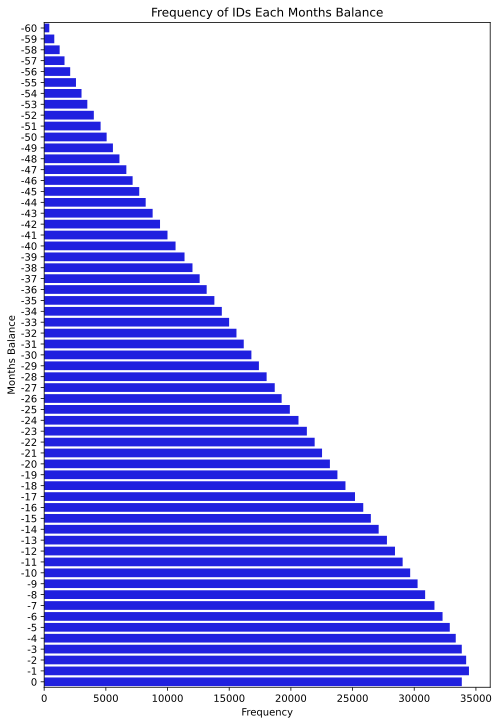

In [33]:
plt.figure(figsize=(8, 12))
sns.barplot(data=out_df, y='MONTHS_BALANCE', x='counts', orient='h', color='b')
plt.ylabel('Months Balance')
plt.xlabel('Frequency')
plt.title('Frequency of IDs Each Months Balance')

In [34]:
print("Number of unique ID in application datasets: ", len(set(application['ID'])))
print("Number of unique ID in credit datasets: ", len(set(credit['ID'])))
print("Number of ID intersection between application and credit datasets: ", 
      len(set(application['ID']).intersection(set(credit['ID']))))

Number of unique ID in application datasets:  438510
Number of unique ID in credit datasets:  45985
Number of ID intersection between application and credit datasets:  36457
